# Project 4 - Predicting a Continuous Target with Regression (Titanic)

## Author: Houston Asher-Laws

## November 16th 2025

In this project instead of predicating class like survied we will predict fare and the amount of money paid for the journey.

In [51]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Section 1. Import and Inspect the Data

In [52]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

In [53]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

titanic['sex'] = titanic['sex'].replace({'male': 0, 'female': 1})

titanic.head()

C:\Users\houst\AppData\Local\Temp\ipykernel_26532\1055250668.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\houst\AppData\Local\Temp\ipykernel_26532\1055250668.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


# Section 3. Feature Selection and Justification

### Case 1. age only

In [54]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

### Case 2. family_size only

In [55]:
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

### Case 3. age and family size

In [56]:
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

### Case 4. Your choice - see below - fill in your variable(s) below. If you use sex or other category, convert to numeric value in Section 2 above before using. 

In [57]:
# Case 4. ???
X4 = titanic[['sex', 'pclass']]
y4 = titanic['fare']

Reflection Questions - answer these in your notebook (in a Markdown cell):

Why might these features affect a passenger’s fare: 

Features like family size can effect the price becasue with the amount of people you are buying for. The age can affect the price depending on how old they are.

List all available features:

age, family size, sex, pclass, sibsp, parch, fare, embarked, alive, alone, deck, who and survived.

Which other features could improve predictions and why:

embarked town could affect the fare depending on what location they are coming from.

How many variables are in your Case 4:

2 variables

Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: 

Knowing the persons sex can determine the fare. Also knowing what there pclass was can tell you how much they paid for there fare.

### Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split the Data

In [58]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)


### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

We'll use a more concise approach - create each model and immediately call the fit() method. 

In [59]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [60]:
from sklearn.metrics import root_mean_squared_error


print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", root_mean_squared_error(y1_test, y_pred_test1,))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print("-" * 40)

print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test MSE:", root_mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print("-" * 40)

print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test MSE:", root_mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print("-" * 40)

print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test MSE:", root_mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))
print("-" * 40)

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364
----------------------------------------
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test MSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641
----------------------------------------
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test MSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688
----------------------------------------
Case 4: Training R²: 0.30902741887346497
Case 4: Test R²: 0.3399011328763929
Case 4: Test MSE: 30.90345156449409
Case 4: Test MAE: 20.399665642008824
----------------------------------------


### Section 4 Reflection Questions - answer these in your notebook (in a Markdown cell):

Compare the train vs test results for each.

Did Case 1 overfit or underfit? Explain:

Case 1 was a underfit score becasue it scored very low for both traning R2 and Test R2. 

Did Case 2 overfit or underfit? Explain:

Case 2 is a underfit becasue both its Traning R2 0.04 and its test 0.02 is still very low making it underfit. 

Did Case 3 overfit or underfit? Explain:

Case 3 is a underfit becasue both its training R2 which is 0.07 and its test 0.04 is still very low.

Did Case 4 overfit or underfit? Explain:

Its stil underfit but instead of being very low its just low. This is becasue the traning is 0.30 and the r2 0.33.


### Adding Age


Did adding age improve the model:

No adding age did'nt make much of a difference it still scored very low r2 scores.

Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): 

Its possible that age does not effect ticket price that much. Another features like pclass has more of a effect on ticket price.

### Worst

Which case performed the worst:

It was Case 1.

How do you know: 

I know this becasue both of its r2 traning and testing scored the lowest out of all the cases.

Do you think adding more training data would improve it (and why/why not): 

No becasue the feature age does not how much of effect on fare prices.

### Best

Which case performed the best:

Case 4

How do you know: 

It was the best because it was the only case that its r2 test and traning were low and not very low.

Do you think adding more training data would improve it (and why/why not): 

Yes if added more traning data with plcass I think that it would improve. Pclass as a huge effect on the fare price.

### Section 4 Reflection Questions - answer these in your notebook (in a Markdown cell):

Compare the train vs test results for each.

Did Case 1 overfit or underfit? Explain:

Case 1 was a underfit score becasue it scored very low for both traning R2 and Test R2. 

Did Case 2 overfit or underfit? Explain:

Case 2 is a underfit becasue both its Traning R2 0.04 and its test 0.02 is still very low making it underfit. 

Did Case 3 overfit or underfit? Explain:

Case 3 is a underfit becasue both its training R2 which is 0.07 and its test 0.04 is still very low.

Did Case 4 overfit or underfit? Explain:

Its stil underfit but instead of being very low its just low. This is becasue the traning is 0.30 and the r2 0.33.


### Adding Age


Did adding age improve the model:

No adding age did'nt make much of a difference it still scored very low r2 scores.

Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): 

Its possible that age does not effect ticket price that much. Another features like pclass has more of a effect on ticket price.

### Worst

Which case performed the worst:

It was Case 1.

How do you know: 

I know this becasue both of its r2 traning and testing scored the lowest out of all the cases.

Do you think adding more training data would improve it (and why/why not): 

No becasue the feature age does not how much of effect on fare prices.

### Best

Which case performed the best:

Case 4

How do you know: 

It was the best because it was the only case that its r2 test and traning were low and not very low.

Do you think adding more training data would improve it (and why/why not): 

Yes if added more traning data with plcass I think that it would improve. Pclass as a huge effect on the fare price.

### ### Section 4 Reflection Questions - answer these in your notebook (in a Markdown cell):

Compare the train vs test results for each.

Did Case 1 overfit or underfit? Explain:

Case 1 was a underfit score becasue it scored very low for both traning R2 and Test R2. 

Did Case 2 overfit or underfit? Explain:

Case 2 is a underfit becasue both its Traning R2 0.04 and its test 0.02 is still very low making it underfit. 

Did Case 3 overfit or underfit? Explain:

Case 3 is a underfit becasue both its training R2 which is 0.07 and its test 0.04 is still very low.

Did Case 4 overfit or underfit? Explain:

Its stil underfit but instead of being very low its just low. This is becasue the traning is 0.30 and the r2 0.33.


### Adding Age


Did adding age improve the model:

No adding age did'nt make much of a difference it still scored very low r2 scores.

Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): 

Its possible that age does not effect ticket price that much. Another features like pclass has more of a effect on ticket price.

### Worst

Which case performed the worst:

It was Case 1.

How do you know: 

I know this becasue both of its r2 traning and testing scored the lowest out of all the cases.

Do you think adding more training data would improve it (and why/why not): 

No becasue the feature age does not how much of effect on fare prices.

### Best

Which case performed the best:

Case 4

How do you know: 

It was the best because it was the only case that its r2 test and traning were low and not very low.

Do you think adding more training data would improve it (and why/why not): 

Yes if added more traning data with plcass I think that it would improve. Pclass as a huge effect on the fare price.

### Section 5. Compare Alternative Models

In this section, we will take the best-performing case and explore other regression models.

### Choose Best Case to Continue
Choose the best case model from the four cases. Use that model to continue to explore additional continuous prediction models. The following assumes that Case 1 was the best predictor  - this may not be the case. Adjust the code to use your best case model instead. 

### Choosing Options
When working with regression models, especially those with multiple input features, we may run into overfitting — where a model fits the training data too closely and performs poorly on new data. To prevent this, we can apply regularization.

Regularization adds a penalty to the model’s loss function, discouraging it from using very large weights (coefficients). This makes the model simpler and more likely to generalize well to new data.

In general: 

If the basic linear regression is overfitting, try Ridge.

If you want the model to automatically select the most important features, try Lasso.

If you want a balanced approach, try Elastic Net.

 

## 5.1 Ridge Regression (L2 penalty)

Ridge Regression is a regularized version of linear regression that adds a penalty to large coefficient values. It uses the L2 penalty, which adds the sum of squared coefficients to the loss function.

This "shrinks" the coefficients, reducing the model’s sensitivity to any one feature while still keeping all features in the model.

Penalty term: L2 = sum of squared weights
Effect: Shrinks weights, helps reduce overfitting, keeps all features

In [61]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)


## 5.2 Elastic Net (L1 + L2 combined)

Lasso Regression uses the L1 penalty, which adds the sum of absolute values of the coefficients to the loss function. Lasso can shrink some coefficients all the way to zero, effectively removing less important features. This makes it useful for feature selection.

Penalty term: L1 = sum of absolute values of weights
Effect: Can shrink some weights to zero (drops features), simplifies the model
Elastic Net combines both L1 (Lasso) and L2 (Ridge) penalties. It balances the feature selection ability of Lasso with the stability of Ridge.

We control the balance with a parameter called l1_ratio:

If l1_ratio = 0, it behaves like Ridge
If l1_ratio = 1, it behaves like Lasso
Values in between mix both types
Penalty term: α × (L1 + L2)
Effect: Shrinks weights and can drop some features — flexible and powerful

In [62]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)


## 5.3 Polynomial Regression

Linear regression is a simple two dimensional relationship - a simple straight line. But we can test more complex relationships. Polynomial regression adds interaction and nonlinear terms to the model. Be careful here - higher-degree polynomials can easily overfit.

In [63]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X2_train_poly = poly.fit_transform(X2_train)
X2_test_poly = poly.transform(X2_test)


In [64]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X2_train_poly, y2_train)
y_pred_poly = poly_model.predict(X2_test_poly)



## 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

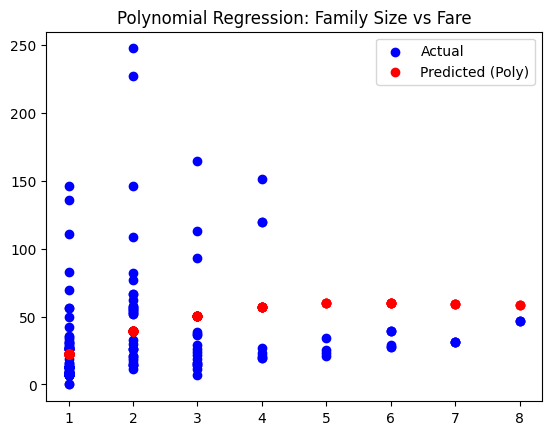

In [71]:
plt.scatter(X2_test, y2_test, color='blue', label='Actual')
plt.scatter(X2_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Family Size vs Fare")
plt.show()

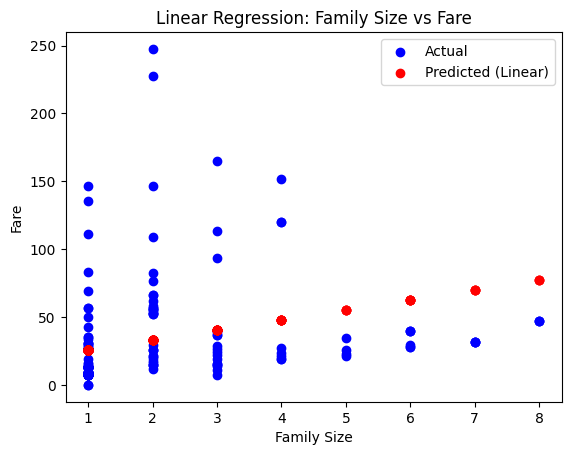

In [73]:
plt.scatter(X2_test, y2_test, color='blue', label='Actual')
plt.scatter(X2_test, y_pred_test2, color='red', label='Predicted (Linear)')
plt.legend()
plt.title("Linear Regression: Family Size vs Fare")
plt.xlabel("Family Size")
plt.ylabel("Fare")
plt.show()

5.4 Reflections (in a Markdown cell):

What patterns does the cubic model seem to capture:

As soon as family size gets larger the predicted fare gets larger.

Where does it perform well or poorly:

It predits the best between 1 to 3 people.

Did the polynomial fit outperform linear regression:

It did not Linear regression peformed better and was able to predict better after 3 family members. 

Where (on the graph or among which kinds of data points) does it fit best:

The model best performs when the family size is small.


## 5.4 Compare All Models

Create a summary table or printout comparing all models:

In [69]:

def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

# Case 4 models
report("Linear (Case 4)", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)

# Polynomial uses Case 2
report("Polynomial (Case 2)", y2_test, y_pred_poly)

Linear (Case 4) R²: 0.340
Linear (Case 4) RMSE: 30.90
Linear (Case 4) MAE: 20.40

Ridge R²: 0.340
Ridge RMSE: 30.89
Ridge MAE: 20.36

ElasticNet R²: 0.369
ElasticNet RMSE: 30.23
ElasticNet MAE: 19.18

Polynomial (Case 2) R²: 0.088
Polynomial (Case 2) RMSE: 36.32
Polynomial (Case 2) MAE: 24.07



## 5.5 Visualize Higher Order Polynomial (for the same 1 input case)

Use the same single input case as you visualized above, but use a higher degree polynomial (e.g. 4, 5, 6, 7, or 8). Plot the result. 

In a Markdown cell, tell us which option seems to work better - your initial cubic (3) or your higher order and why. 

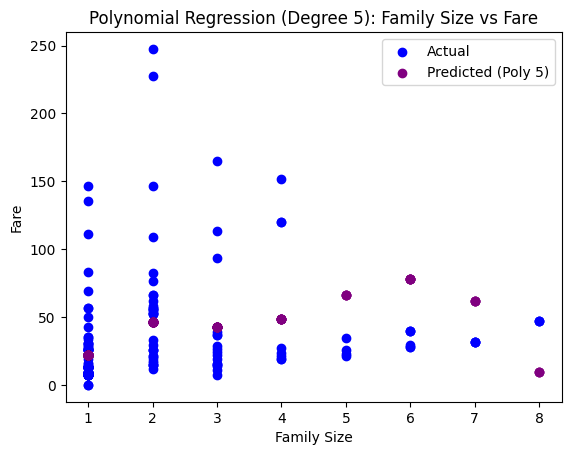

In [74]:

poly5 = PolynomialFeatures(degree=5)
X2_train_poly5 = poly5.fit_transform(X2_train)
X2_test_poly5 = poly5.transform(X2_test)

poly5_model = LinearRegression()
poly5_model.fit(X2_train_poly5, y2_train)
y_pred_poly5 = poly5_model.predict(X2_test_poly5)


plt.scatter(X2_test, y2_test, color='blue', label='Actual')
plt.scatter(X2_test, y_pred_poly5, color='purple', label='Predicted (Poly 5)')

plt.legend()
plt.title("Polynomial Regression (Degree 5): Family Size vs Fare")
plt.xlabel("Family Size")
plt.ylabel("Fare")
plt.show()

In a Markdown cell, tell us which option seems to work better - your initial cubic (3) or your higher order and why. 

the cubic (3) works the best out of the other two becasue after family size 3 it predits better.

# Section 6. Final Thoughts & Insights

Your notebook should tell a data story. Use this section to demonstrate your thinking and value as an analyst.

### 6.1 Summarize Findings 

What features were most useful?

The most useful features were family size, p-class, and age.

What regression model performed best?

The Elastic Net model performed the best.

How did model complexity or regularization affect results?

Regularization slightly improved the performance.

## 6.2 Discuss Challenges

Was fare hard to predict? Why?

It was hard to predict most of the features that I tested like age, family size, and sex did not determine ticket price that well.

Did skew or outliers impact the models?

yes there were some passengers who paid very high prices which affected the outliers.